In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

from scipy import stats

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [2]:
# 数据载入函数
def indata_loader(num_file):
    data_array = []
    for i in range(num_file):
        file_name = '/home/mist/mix/ighm/mix_out/mix_np/m_' + str(i+1) + '_a_xa.temt' # 
        array = np.loadtxt(file_name, skiprows=1, usecols = 1)
        # array = array.astype(int) # 整数化
        array=array/max(array) # 归一化
        data_array.append(array)
    data_array = np.array(data_array)
    return data_array

def outdata_loader(num_file):
    data_array = []
    for i in range(num_file):
        file_name = '/home/mist/plasma_cell/ighm/wig_fin/pc_fin_' + str(i+1) + '.npy' #
        array = np.load(file_name)
        # array = (array/10).astype(int) # 整数化
        array=array/max(array) # 归一化
        for i in range(num_file):
            data_array.append(array)
    data_array = np.array(data_array)
    return data_array

In [3]:
# 载入数据
num_in = 2500 #
num_out = 50 #
x_data = indata_loader(num_in)
y_data = outdata_loader(num_out)
# np.savetxt('/home/mist/~/in_norm.txt', x_data)
# np.savetxt('/home/mist/~/out_norm.txt', y_data)

In [4]:
# 划分训练集，验证集和测试集,两次划分
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data,                
    test_size=0.1        # test_size
)  

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train,    
    test_size=0.1        
)  

In [5]:
# 定义模型
model = Sequential()
model.add(Dense(512, input_dim=1998, activation='relu'))   # 输入层，使用 'relu' 激活函数
model.add(Dense(256, activation='relu'))  # 隐藏层
model.add(Dense(1998, activation='linear'))  # 输出层，使用 'linear' 激活函数，因为我们的目标值是连续的

# 编译模型
model.compile(loss='mean_squared_error',  # 使用均方误差作为损失函数，这是一个常用的损失函数，适合处理连续的目标值
              optimizer='adam',  # 使用 Adam 优化器，它是一个常用且效果良好的优化器
              metrics=['accuracy'])  # 我们将准确度作为训练的指标

# 训练模型
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid) ,epochs=200, batch_size=32)

Epoch 1/200


2023-05-30 00:01:00.375208: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-30 00:01:00.405572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-30 00:01:00.405765: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-30 00:01:00.406159: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

48/64 [=====================>........] - ETA: 0s - loss: 0.0430 - accuracy: 0.0059   

2023-05-30 00:01:01.818116: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


64/64 [==============================] - 1s 4ms/step - loss: 0.0341 - accuracy: 0.0099 - val_loss: 0.0056 - val_accuracy: 0.0356
Epoch 2/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.0267 - val_loss: 0.0073 - val_accuracy: 0.0222
Epoch 3/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.0316 - val_loss: 0.0050 - val_accuracy: 0.0533
Epoch 4/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.0257 - val_loss: 0.0061 - val_accuracy: 0.0222
Epoch 5/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.0198 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.0212 - val_loss: 0.0045 - val_accuracy: 0.0133
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.0173 - val_loss: 0.0042 - val_accuracy: 0.0222
Epoch 8/200
64/64 [==

In [6]:
# 获取损失值和准确率
loss = history.history['loss']  # 获取训练集上的损失值
val_loss = history.history['val_loss']  # 获取验证集上的损失值
accuracy = history.history['accuracy']  # 获取训练集上的准确度
val_accuracy = history.history['val_accuracy']  # 获取验证集上的准确度

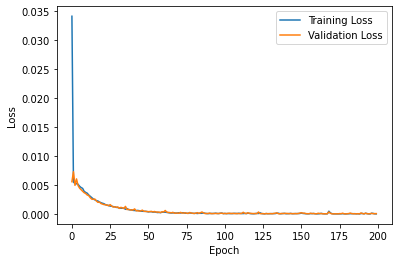

In [8]:
import matplotlib.pyplot as plt

# 绘制损失值曲线
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.savefig('/home/mist/tensorflow/010/loss_curve.png', dpi=600)

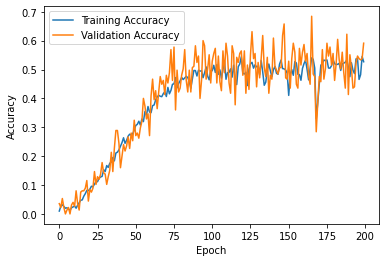

In [9]:
# 绘制准确度曲线
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig('/home/mist/tensorflow/010/accuracy_curve.png', dpi=600)

In [16]:
# 保存loss & accuracy
filename = open('/home/mist/tensorflow/010/val_accuracy.txt', 'w')  
for i,value in enumerate(val_accuracy):
    filename.write(str(i)+'\t'+str(value)+'\n') 
filename.close()

In [10]:
# 测试集测试
y_pred = model.predict(x_test)      

In [17]:
# 利用测试集进行评估
test_loss, test_acc = model.evaluate(x_test, y_test)

# 保存结果：
filename = open('/home/mist/tensorflow/010/val_accuracy.txt', 'w')  
for i,value in enumerate(val_accuracy):
    filename.write(str(i)+'\t'+str(value)+'\n') 
filename.close()

8/8 [==============================] - 0s 1ms/step - loss: 1.1450e-04 - accuracy: 0.5680


In [23]:
# 保存测试集、测试集对应的真实值和测试集的预测结果
np.save('/home/mist/tensorflow/010/x_test.npy',x_test)
np.save('/home/mist/tensorflow/010/y_test.npy',y_test)
np.save('/home/mist/tensorflow/010/y_pred.npy',y_pred)

In [32]:
x=np.arange(len(x_data))
x.shape

(2500,)

In [35]:
x_test[0].shape

(1998,)

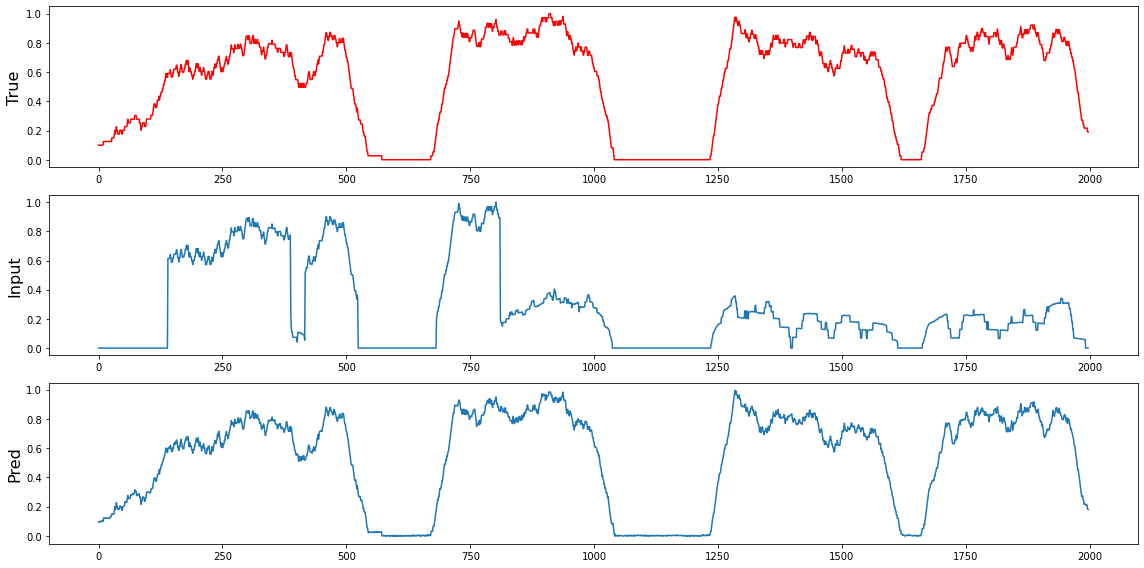

In [49]:
# 随机选择一个测试集的结果绘图
import numpy as np
import matplotlib.pyplot as plt

# 数据
x = np.arange(len(y_test[0]))
y1 = y_test[0]
y2 = x_test[0]
y3 = y_pred[0]

# 创建画布和子图
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 8))

# 绘制第一个子图
axes[0].plot(x, y1, color='red')  # 设置折线颜色为红色
#axes[0].set_title('y pred 0')
axes[0].set_ylabel('True', fontsize=16)

# 绘制第二个子图
axes[1].plot(x, y2)
#axes[1].set_title('x test 0')
axes[1].set_ylabel('Input', fontsize=16)

# 绘制第三个子图
axes[2].plot(x, y3)
#axes[2].set_title('y test 0')
axes[2].set_ylabel('Pred', fontsize=16)

# # 添加总的纵坐标标题
# fig.text(0, 0.5, 'Relative abundance', va='center', rotation='vertical', fontsize=16)

# 调整子图之间的间距
plt.tight_layout()

# 保存图片
plt.savefig('/home/mist/tensorflow/010/abundance_compare.png', dpi=1200)

# 显示图形
plt.show()


In [59]:
y_pred_den = np.concatenate([array for array in y_pred])
y_pred_den[3996]

0.08432658

In [2]:
y_pred = np.load('/home/mist/tensorflow/010/y_pred.npy')
y_test = np.load('/home/mist/tensorflow/010/y_test.npy')
x_test = np.load('/home/mist/tensorflow/010/x_test.npy')

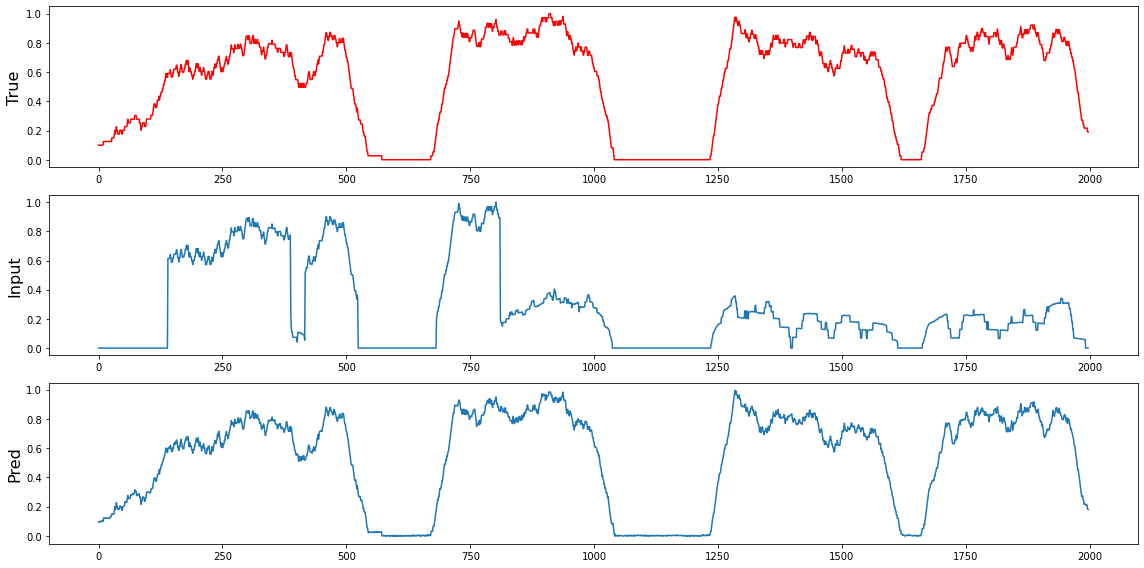

In [4]:
# 数据
x = np.arange(len(y_test[0]))
y1 = y_test[0]
y2 = x_test[0]
y3 = y_pred[0]

# 创建画布和子图
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 8))

# 绘制第一个子图
axes[0].plot(x, y1, color='red')  # 设置折线颜色为红色
#axes[0].set_title('y pred 0')
axes[0].set_ylabel('True', fontsize=16)

# 绘制第二个子图
axes[1].plot(x, y2)
#axes[1].set_title('x test 0')
axes[1].set_ylabel('Input', fontsize=16)

# 绘制第三个子图
axes[2].plot(x, y3)
#axes[2].set_title('y test 0')
axes[2].set_ylabel('Pred', fontsize=16)

# # 添加总的纵坐标标题
# fig.text(0, 0.5, 'Relative abundance', va='center', rotation='vertical', fontsize=16)

# 调整子图之间的间距
plt.tight_layout()

# 保存图片
plt.savefig('/home/mist/tensorflow/010/abundance_compare_300dpi.png', dpi=300)

# 显示图形
plt.show()

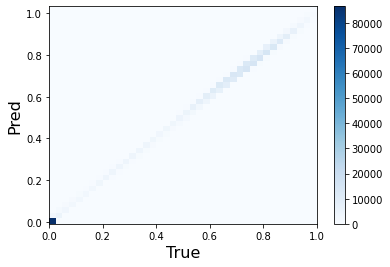

In [15]:
y_pred_den = np.concatenate([array for array in y_pred])
y_true_den = np.concatenate([array for array in y_test])


# 绘制密度图
plt.hist2d(y_true_den, y_pred_den, bins=40, cmap='Blues')
plt.colorbar()

# 设置图表标题和轴标签
#plt.title('2D Density Plot')
plt.xlabel('True', fontsize=16)
plt.ylabel('Pred', fontsize=16)

#
# plt.savefig('/home/mist/tensorflow/010/density_plot.png', dpi=600)

# 显示图表
plt.show()


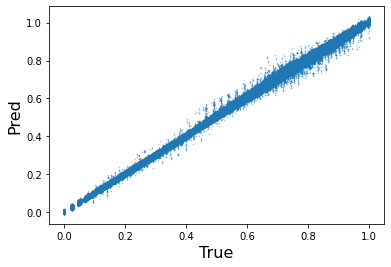

In [12]:
# 绘制散点图
plt.scatter(y_true_den, y_pred_den, s =0.2, alpha=0.5)

# 添加标题和标签
# plt.title('Scatter Plot')
plt.xlabel('True', fontsize=16)
plt.ylabel('Pred', fontsize=16)

plt.savefig('/home/mist/tensorflow/010/scatter_plot.png', dpi=600)

# 显示图形
plt.show()

In [17]:
correlation, p_value = stats.pearsonr(y_true_den, y_pred_den)


In [33]:
print(correlation)
print(p_value)

0.9996258539587234
0.0


In [36]:
x_test_den = np.concatenate([array for array in x_test])
correlation2, p_value2 = stats.pearsonr(y_true_den, x_test_den)
print(correlation2)
print(p_value2)

0.5808117924685797
0.0


In [ ]:
# from here all the trying in the process

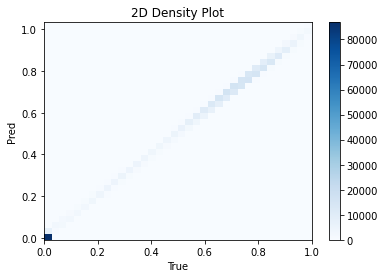

In [77]:
y_pred_den = np.concatenate([array for array in y_pred])
y_true_den = np.concatenate([array for array in y_test])


# 绘制密度图
plt.hist2d(y_true_den, y_pred_den, bins=36, cmap='Blues')
plt.colorbar()

# 设置图表标题和轴标签
plt.title('2D Density Plot')
plt.xlabel('True', fontsize=16)
plt.ylabel('Pred')

# 显示图表
plt.show()


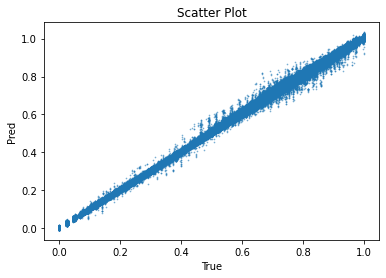

In [81]:
# 绘制散点图
plt.scatter(y_true_den, y_pred_den, s =0.5, alpha=0.5)

# 添加标题和标签
# plt.title('Scatter Plot')
plt.xlabel('True', fontsize=16)
plt.ylabel('Pred', fontsize=16)

# 显示图形
plt.show()

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde

# Generate fake data

x = y_true_den

y = y_pred_den

# Calculate the point density

xy = np.vstack([x,y])

z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()

# ax.scatter(x, y, c=z, s=100, edgecolor='Blues')
ax.scatter(x, y, c=z, s=0.5)

plt.show()

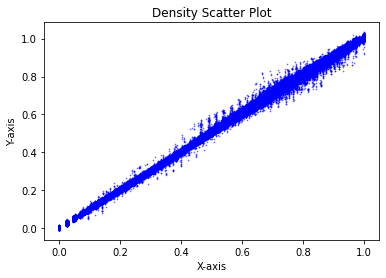

In [83]:
import numpy as np
import matplotlib.pyplot as plt


# 绘制散点图
plt.scatter(y_true_den, y_pred_den, c='blue', s=0.5, alpha=0.5)

# 添加颜色映射和颜色条
heatmap = plt.cm.ScalarMappable(cmap='Blues')
heatmap.set_array(y)
#plt.colorbar(heatmap)

# 添加标题和标签
plt.title('Density Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# 显示图形
plt.show()



In [52]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirror.sjtu.edu.cn/pypi/web/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 2.2 MB/s eta 0:00:00a 0:00:01


In [21]:
type(y_pred)

numpy.ndarray

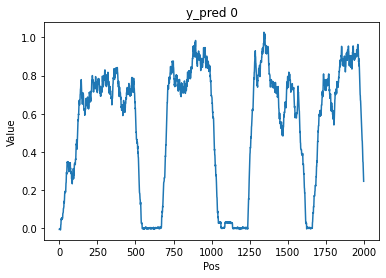

In [18]:
# 作图 预测输出
data =y_pred[0]

x = np.arange(len(data))

plt.plot(x, data)

plt.xlabel('Pos')
plt.ylabel('Value')
plt.title('y_pred 0')

plt.show()

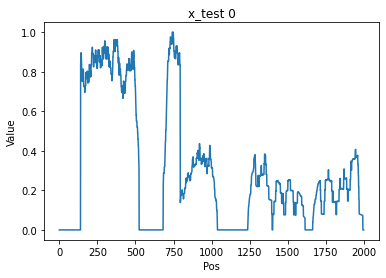

In [19]:
# 作图 预测输入 测试集
data =x_test[0]

x = np.arange(len(data))

plt.plot(x, data)

plt.xlabel('Pos')
plt.ylabel('Value')
plt.title('x_test 0')

plt.show()

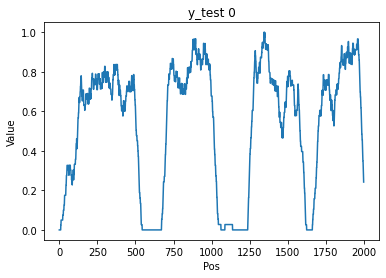

In [20]:
# 作图 真实 测试集
data =y_test[0]

x = np.arange(len(data))

plt.plot(x, data)

plt.xlabel('Pos')
plt.ylabel('Value')
plt.title('y_test 0')

plt.show()

In [21]:
y_pred[0] == y_test[0]

array([False, False, False, ..., False, False, False])

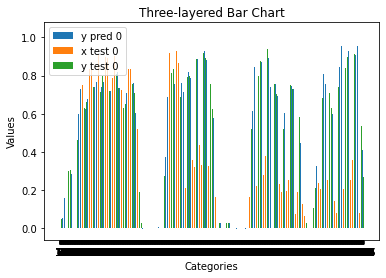

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 数据
categories = np.arange(len(y_test[0])) # 柱状图的类别
series1 = y_pred[0]  # 第一层数据
series2 = x_test[0]  # 第二层数据
series3 = y_test[0]  # 第三层数据

# 创建位置数组
x = np.arange(len(categories))
width = 0.2  # 柱状图的宽度

# 绘制柱状图
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, series1, width, label='y pred 0')
rects2 = ax.bar(x, series2, width, label='x test 0')
rects3 = ax.bar(x + width, series3, width, label='y test 0')

# 设置图例和标签
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Three-layered Bar Chart')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


# 显示图形
plt.show()


In [137]:
import random

x = []
for i in range(100):
    a = [i,i+1,i+2]
    x.append(a)
x = np.array(x)

y = []
for i in range(100):
    a = [i,i+1,i+2]
    y.append(a)
y = np.array(y)

In [23]:
x = np.arange(len(data))

In [24]:
x

array([   0,    1,    2, ..., 1995, 1996, 1997])